In [144]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent.parent
sys.path.append(str(parent_dir))
hartdir = '/Users/thomasmcintosh/Downloads/code_master_project_joost/SCExAO/SCExAO_brp'
sys.path.append(hartdir)
import SCExAO_Model as scexmodel
import SCExAO_CalibrationPlots as calib
from instruments import *
from pyMuellerMat.physical_models.charis_physical_models import *
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.linewidth": 3,
})


In [145]:
def arr_csv_by_HWP(csv_path, hwp_order, todelete=None, new_csv_path=None):
    """Arranges CSVs by a custom HWP order. Deletes selected angles.
    
    Parameters:
    -----------
    csv_path: str or Path
        CSV containing relevant headers, can be obtained from
        write_fits_info_to_csv().
    hwp_order: list or np.ndarray
        List of desired HWP order. 
    todelete: list or np.ndarray, optional
        Optional list of HWP angles to delete.
    new_csv_path: str or Path, optional
        Optional path to create the new csv. If set to None,
        the csv will be edited in place.
    
    Returns:
    ---------
    df: Pandas DataFrame
        Returns DataFrame for visual inspection of csv changes.
        
    """
    hwp_order = np.array(hwp_order)

    # Load to a DF and sort

    df = pd.read_csv(csv_path)
    hwp_angles = df['RET-ANG1']
    if todelete:
        todelete = np.array(todelete)
        indices = np.where(np.isin(df['RET-ANG1'],todelete))[0]
        df = df.drop(indices)
    # Ensure the pattern loops correctly

    npattern = len(hwp_angles) // len(hwp_order)
    remainder = len(hwp_angles) % len(hwp_order)
    hwp_pattern = np.tile(hwp_order,npattern)
    hwp_pattern = np.concatenate((hwp_pattern,hwp_order[:remainder]))
    
    # Modify the DF

    df["RET-ANG1"] = pd.Categorical(df['RET-ANG1'],categories=hwp_order,ordered=True)
    df = df.sort_values(by=['D_IMRANG','RET-ANG1'])

    if new_csv_path:
        df.to_csv(new_csv_path,index=False)
    else:
        df.to_csv(csv_path,index=False)
    return df

    

In [146]:
csv = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin9_no_pickoff.csv'
csv_new = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin9_no_pickoff_dd.csv'
hwp_order = [0,45,11.25,56.25,22.5,67.5,33.75,78.75]
arr_csv_by_HWP(csv,hwp_order,todelete=[90.0],new_csv_path=csv_new)

,filepath,D_IMRANG,RET-ANG1,single_sum,single_diff,LCOUNTS,RCOUNTS,sum_std,diff_std,wavelength_bin
0,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,45.0,0.00,1.023290e+08,1.323473e+07,4.454716e+07,5.778189e+07,10115.782047,10115.782047,1575.0495
1,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,45.0,45.00,1.012836e+08,-2.553225e+06,5.191843e+07,4.936520e+07,10063.977008,10063.977008,1575.0495
2,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,45.0,11.25,1.018577e+08,1.577222e+07,4.304275e+07,5.881497e+07,10092.458459,10092.458459,1575.0495
3,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,45.0,56.25,1.017632e+08,1.200697e+06,5.028128e+07,5.148197e+07,10087.777236,10087.777236,1575.0495
4,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,45.0,22.50,1.009212e+08,9.698390e+06,4.561142e+07,5.530981e+07,10045.955529,10045.955529,1575.0495
...,...,...,...,...,...,...,...,...,...,...
59,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,132.5,56.25,1.030171e+08,-2.476341e+07,6.389027e+07,3.912686e+07,10149.735644,10149.735644,1575.0495
60,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,132.5,22.50,1.049863e+08,-2.674544e+07,6.586587e+07,3.912043e+07,10246.282544,10246.282544,1575.0495
61,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,132.5,67.50,1.029967e+08,-7.618543e+06,5.530762e+07,4.768908e+07,10148.728709,10148.728709,1575.0495
62,/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes...,132.5,33.75,1.042782e+08,-3.845161e+07,7.136489e+07,3.291328e+07,10211.668414,10211.668414,1575.0495


In [147]:
hwp_order = [0,45,11.25,56.25,22.5,67.5,33.75,78.75]
csv = '/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/csvs_all/bin4_fixed.csv'
csv_new = '/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/csvs_all/bin4_fixed2.csv'
arr_csv_by_HWP(csv,hwp_order,csv_new)

,Unnamed: 0,filepath,D_IMRANG,RET-ANG1,single_sum,norm_single_diff,LCOUNTS,RCOUNTS,sum_std,diff_std,wavelength_bin
4,10,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,45.0,0.00,2.686696e+07,-0.019240,1.369414e+07,1.317283e+07,5183.335104,0.000193,1328.6331
0,0,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,45.0,45.00,2.788130e+07,-0.083247,1.510116e+07,1.278014e+07,5280.274531,0.000189,1328.6331
5,13,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,45.0,11.25,2.796165e+07,-0.692255,2.365911e+07,4.302532e+06,5287.877220,0.000136,1328.6331
1,1,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,45.0,56.25,2.677636e+07,0.621768,5.067821e+06,2.170854e+07,5174.587593,0.000151,1328.6331
6,16,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,45.0,22.50,2.861091e+07,-0.966653,2.813205e+07,4.788584e+05,5348.916328,0.000048,1328.6331
...,...,...,...,...,...,...,...,...,...,...,...
73,119,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,112.5,56.25,2.536306e+07,0.665816,4.238253e+06,2.112481e+07,5036.175462,0.000148,1328.6331
78,127,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,112.5,22.50,2.594482e+07,-0.079706,1.400645e+07,1.193837e+07,5093.605954,0.000196,1328.6331
74,121,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,112.5,67.50,2.635872e+07,-0.038467,1.368633e+07,1.267239e+07,5134.074377,0.000195,1328.6331
79,129,/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/...,112.5,33.75,2.500111e+07,0.640737,4.490981e+06,2.051013e+07,5000.110999,0.000154,1328.6331


In [148]:
def process_dataset2(input_dataset): 
    # Making sure that input_dataset is a numpy array
    # print("Entered process_dataset")
    # print("Pre np.array Input dataset: ", np.shape(input_dataset))
    input_dataset = np.array(input_dataset)
    # print("Post np.array Input dataset: ", np.shape(input_dataset))
    sums = input_dataset[1::2]
    differences = input_dataset[::2]*sums
    

    # print("Differences: ", differences)
    # print("Sums shape: ", np.shape(sums))e

    double_differences, double_sums = build_double_differences_and_sums(differences, sums)

    interleaved_values = np.ravel(np.column_stack((double_differences, double_sums)))

    # Format this into one array.
    return interleaved_values

In [149]:
def plot_data_and_model2(interleaved_values, interleaved_stds, model, 
    configuration_list, imr_theta_filter=None, wavelength=None, save_path = None, mode = 'VAMPIRES',title=None):
    """
    Plots double difference and double sum measurements alongside model predictions,
    grouped by image rotator angle (D_IMRANG). Optionally filters by a specific 
    image rotator angle and displays a wavelength in the plot title.

    Parameters
    ----------
    interleaved_values : np.ndarray
        Interleaved array of observed double difference and double sum values.
        Expected format: [dd1, ds1, dd2, ds2, ...]. In CHARIS mode use
        single differences and sums.

    interleaved_stds : np.ndarray
        Interleaved array of standard deviations corresponding to the observed values.

    model : np.ndarray
        Interleaved array of model-predicted double difference and double sum values.
        If charis use single differences and sums. 

    configuration_list : list of dict
        List of system configurations (one for each measurement), where each dictionary 
        contains component settings like HWP and image rotator angles.

    imr_theta_filter : float, optional
        If provided, only measurements with this image rotator angle (rounded to 0.1°) 
        will be plotted.

    wavelength : str or int, optional
        Wavelength (e.g., 670 or "670") to display as a centered title with "nm" units 
        (e.g., "670nm").
    mode : str
        Default is VAMPIRES. If mode is CHARIS normalized single differences will be used.
    title : str, optional
        Default is the wavelength.

    Returns
    -------
    fig, ax
    """
    # Calculate double differences and sums from interleaved single differences if in VAMPIRES mode 
    interleaved_stds = process_errors(interleaved_stds, interleaved_values)
    interleaved_values = process_dataset(interleaved_values)
    model = process_model(model)

    # Extract double differences and double sums
    dd_values = interleaved_values[::2]
    ds_values = interleaved_values[1::2]
    dd_stds = interleaved_stds[::2]
    ds_stds = interleaved_stds[1::2]
    dd_model = model[::2]
    ds_model = model[1::2]
    print('ddvals',dd_values)
    print('ddsums',len(ds_values))
    print('dsmodel',len(ds_model))
    print('config',len(configuration_list))
    
    # Group by image_rotator theta
    dd_by_theta = {}
    ds_by_theta = {}
    if mode ==  'VAMPIRES':
        index = 2
    if mode == 'CHARIS':
        index = 2
    for i, config in enumerate(configuration_list[::index]):
        hwp_theta = config["hwp"]["theta"]
        imr_theta = round(config["image_rotator"]["theta"], 1)

        if imr_theta_filter is not None and imr_theta != round(imr_theta_filter, 1):
            continue

        if imr_theta not in dd_by_theta:
            dd_by_theta[imr_theta] = {"hwp_theta": [], "values": [], "stds": [], "model": []}
        dd_by_theta[imr_theta]["hwp_theta"].append(hwp_theta)
        dd_by_theta[imr_theta]["values"].append(dd_values[i])
        dd_by_theta[imr_theta]["stds"].append(dd_stds[i])
        dd_by_theta[imr_theta]["model"].append(dd_model[i])

        if imr_theta not in ds_by_theta:
            ds_by_theta[imr_theta] = {"hwp_theta": [], "values": [], "stds": [], "model": []}
        ds_by_theta[imr_theta]["hwp_theta"].append(hwp_theta)
        ds_by_theta[imr_theta]["values"].append(ds_values[i])
        ds_by_theta[imr_theta]["stds"].append(ds_stds[i])
        ds_by_theta[imr_theta]["model"].append(ds_model[i])
    # Create the plots
    if mode == 'VAMPIRES':
        num_plots = 2
        fig, axes = plt.subplots(1, num_plots, figsize=(14, 6), sharex=True)

    elif mode == 'CHARIS':
        fig, axarr = plt.subplots(
        2, 1, 
        figsize=(10, 6), 
        gridspec_kw={"height_ratios": [3, 1]}, 
        sharex=True
        )
        ax = axarr[0]
        small_ax = axarr[1]

    # Double Difference plot
    if mode == 'VAMPIRES':
        ax = axes[0]
        for theta, d in dd_by_theta.items():
           err = ax.errorbar(d["hwp_theta"], d["values"], yerr=d["stds"], fmt='o', label=f"{theta}°")
           color = err[0].get_color()
           ax.plot(d["hwp_theta"], d["model"], '-', color=color)
        ax.set_xlabel(r"HWP $\theta$ (deg)")
        ax.set_ylabel("Double Difference")
        ax.legend(title=r"IMR $\theta$")
    # Double Sum plot
        ax = axes[1]
        for theta, d in ds_by_theta.items():
            err = ax.errorbar(d["hwp_theta"], d["values"], yerr=d["stds"], fmt='o', label=f"{theta}°")
            color = err[0].get_color()
            ax.plot(d["hwp_theta"], d["model"], '-', color=color)
        ax.set_xlabel(r"HWP $\theta$  (deg)")
        ax.set_ylabel("Double Sum")
        ax.legend(title=r"IMR $\theta$")
    elif mode == 'CHARIS':
        for theta, d in dd_by_theta.items():
           err = ax.errorbar(d["hwp_theta"], d["values"], yerr=d["stds"], fmt='o', label=f"{theta}°")
           color = err[0].get_color()
           ax.plot(d["hwp_theta"], d["model"], '-', color=color)
           residuals =  ((np.array(d["values"]) - np.array(d["model"])))*100
           small_ax.scatter(d['hwp_theta'],residuals,color=color)
        small_ax.axhline(0, color='black', linewidth=1)
        small_ax.set_xlabel(r"HWP $\theta$ (deg)")
        small_ax.set_ylabel(r"Residual ($\%$)", fontsize = 15)
        ax.set_ylabel("Single Difference")
        ax.legend(title=r"IMR $\theta$", fontsize=10)
        ax.grid()

    # Set a suptitle if wavelength is provided
    if wavelength is not None and title is None:
        fig.suptitle(f"{wavelength}nm")
    if title:
        fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

    if save_path != None:
        plt.savefig(save_path,dpi=600, bbox_inches='tight')

    plt.show()
    return fig, ax

In [150]:
# make hart csv work with new code
import pandas as pd
csvpath = '/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/csvs/bin4_fixed2.csv'
df = pd.read_csv(csvpath)
# unnormalize single difference
df['norm_single_diff'] = df['norm_single_diff'] *df['single_sum']
df = df.rename(columns={'norm_single_diff':'single_diff'})
df.to_csv(csvpath,index=False)


KeyError: 'norm_single_diff'

ddvals [ 0.03295287 -0.65777464 -0.96308783 -0.70645861  0.51420336 -0.21211871
 -0.81545902 -0.94076465  0.86046991  0.28934396 -0.44765347 -0.92441873
  0.97635877  0.71861296  0.04141919 -0.6577452   0.82948215  0.95801236
  0.52268449 -0.21435157  0.46089711  0.94180353  0.86973951  0.28753196
 -0.02897985  0.67388457  0.98636339  0.71632039 -0.51194155  0.22892764
  0.8390914   0.95719711 -0.85965744 -0.2731946   0.47026908  0.94171991
 -0.97795012]
ddsums 37
dsmodel 37
config 74


ddvals [ 0.03295287 -0.65777464 -0.96308783 -0.70645861  0.51420336 -0.21211871
 -0.81545902 -0.94076465  0.86046991  0.28934396 -0.44765347 -0.92441873
  0.97635877  0.71861296  0.04141919 -0.6577452   0.82948215  0.95801236
  0.52268449 -0.21435157  0.46089711  0.94180353  0.86973951  0.28753196
 -0.02897985  0.67388457  0.98636339  0.71632039 -0.51194155  0.22892764
  0.8390914   0.95719711 -0.85965744 -0.2731946   0.47026908  0.94171991
 -0.97795012]
ddsums 37
dsmodel 37
config 74


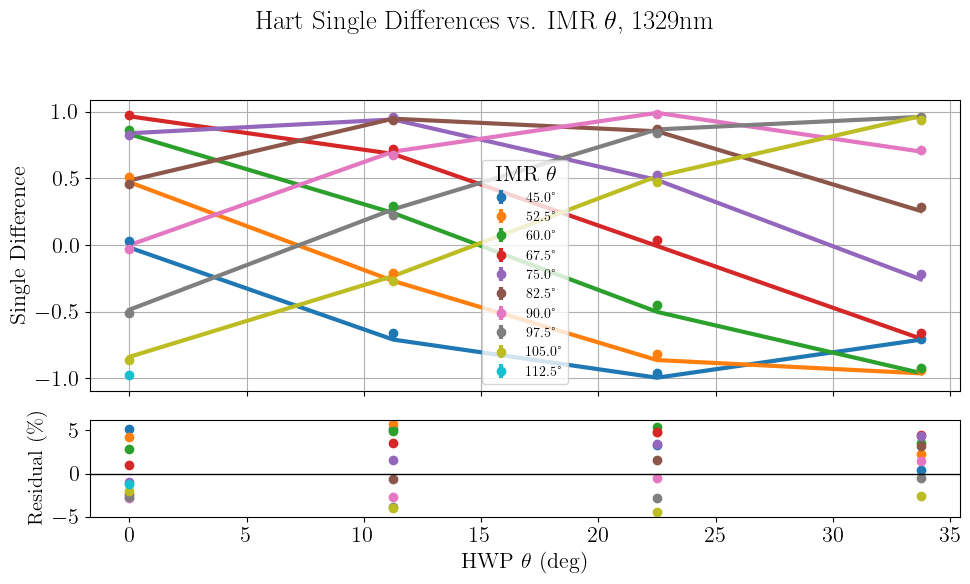

NameError: name 'small_ax' is not defined

In [ ]:
offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "rotation matrix": {
                "type": "rotator_function",
                "properties" : {'pa':offset_cal},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "diattenuator_retarder_function",
                "properties": {"theta":-45,"epsilon":1},
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)

# Load in data
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/csvs/bin4_fixed2.csv')
interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)

# Get our model retardances from Joost t Hart physical models
wsio2_ = 1.623
wmgf2_ = 1.268
d_ = 262.56
p = [HWP_retardance(wavelength_bins,wsio2_,wmgf2_)[4], IMR_retardance(wavelength_bins,d_)[4]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)
# Process these into interleaved single norm differences and sums

# Plot the modeled and observed values


fig,ax_imr = plot_data_and_model2(interleaved_values, interleaved_stds, LR_intensities,configuration_list,wavelength= wavelength_bins[4], title=r'Hart Single Differences vs. IMR $\theta$, 1329nm',mode='CHARIS')
ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  # both major and minor
)
ax_imr.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
# Show minor ticks
ax_imr.minorticks_on()
ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',
      # both major and minor
)
small_ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)

small_ax.set_xlim(0,180)

# Show minor ticks
small_ax.minorticks_on()
#fig_imr.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/hart/plots/vs_imr_1575nm.png', bbox_inches='tight', dpi=600)


In [ ]:
def plot_data_and_model_x_imr2(interleaved_values, interleaved_stds, model, 
    configuration_list, hwp_theta_filter=None, wavelength=None, save_path = None,title=None):
    """
    Plots single differences vs imr angle for some amount of HWP angles. Similar to figure 6 in
    Joost t Hart 2021.

    Parameters
    ----------
    interleaved_values : np.ndarray
        Interleaved array of observed 
        single differences and sums.

    interleaved_stds : np.ndarray
        Interleaved array of standard deviations corresponding to the observed values.

    model : np.ndarray
        Interleaved array of model-predicted double difference and double sum values.
        If charis use single differences and sums. 

    configuration_list : list of dict
        List of system configurations (one for each measurement), where each dictionary 
        contains component settings like HWP and image rotator angles.

    hwp_theta_filter : float, optional
        If provided, only measurements with this hwp angle will be plotted.

    wavelength : str or int, optional
        Wavelength (e.g., 670 or "670") to display as a centered title with "nm" units 
        (e.g., "670nm").
    title: str, optional
        Optional title

    Returns
    -------
    fig, ax, small_ax
    """
    # Calculate double differences and sums from interleaved single differences if in VAMPIRES mode 
    interleaved_stds = process_errors(interleaved_stds, interleaved_values)
    interleaved_values = process_dataset2(interleaved_values)
    model = process_dataset2(model)
    print('model', len(model))
    print('interleaved',len(interleaved_values))
    print(len(configuration_list))

    # Extract double differences and double sums
    dd_values = interleaved_values[::2]
    ds_values = interleaved_values[1::2]
    dd_stds = interleaved_stds[::2]
    ds_stds = interleaved_stds[1::2]
    dd_model = model[::2]
    ds_model = model[1::2]

    # Group by hwp theta
    dd_by_theta = {}
    ds_by_theta = {}
   
    
    for i, config in enumerate(configuration_list[::2]):
        imr_theta = config["image_rotator"]["theta"]
        hwp_theta = config["hwp"]["theta"]

        if hwp_theta_filter is not None and not np.any(np.isclose(hwp_theta, hwp_theta_filter, atol=1e-2)):
         continue

        if hwp_theta not in dd_by_theta:
            dd_by_theta[hwp_theta] = {"imr_theta": [], "values": [], "stds": [], "model": []}
        dd_by_theta[hwp_theta]["imr_theta"].append(imr_theta)
        dd_by_theta[hwp_theta]["values"].append(dd_values[i])
        dd_by_theta[hwp_theta]["stds"].append(dd_stds[i])
        dd_by_theta[hwp_theta]["model"].append(dd_model[i])

        if hwp_theta not in ds_by_theta:
            ds_by_theta[hwp_theta] = {"imr_theta": [], "values": [], "stds": [], "model": []}
        ds_by_theta[hwp_theta]["imr_theta"].append(imr_theta)
        ds_by_theta[hwp_theta]["values"].append(ds_values[i])
        ds_by_theta[hwp_theta]["stds"].append(ds_stds[i])
        ds_by_theta[hwp_theta]["model"].append(ds_model[i])

   
    num_plots = 1
    sizex=10
    fig, axarr = plt.subplots(
    2, 1, 
    figsize=(sizex, 6), 
    gridspec_kw={"height_ratios": [3, 1]}, 
    sharex=True
    )

    ax = axarr[0]
    small_ax = axarr[1]

    # Double Difference plot
    
    for idx, (theta, d) in enumerate(dd_by_theta.items()):
        hart_cmap = ['cornflowerblue','paleturquoise','orange','red']
        color=hart_cmap[idx]
        err = ax.errorbar(d["imr_theta"], d["values"], color=color,yerr=d["stds"], fmt='o', label=f"{theta}°")
        #color = err[0].get_color
        ax.plot(d["imr_theta"], d["model"], '-', color=color)
        residuals =  (np.array(d["values"]) - np.array(d["model"]))*100
        small_ax.scatter(d['imr_theta'],residuals,color=color)
    small_ax.axhline(0, color='black', linewidth=1)
    small_ax.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='black')
    small_ax.grid(which='minor',axis='y', linestyle='-', linewidth=0.3, color='gray')
    small_ax.set_xlabel(r"IMR $\theta$ (deg)")
    #small_ax.set_xlim(0,180)
    #ax.invert_yaxis()
    small_ax.set_ylabel(r"Residual ($\%$)", fontsize = 15)
    #small_ax.yaxis.set_minor_locator(MultipleLocator(1))
    small_ax.xaxis.set_major_locator(MultipleLocator(10))
    small_ax.grid(which='major', axis='x', linestyle='-', linewidth=0.5, color='gray')
    small_ax.tick_params(axis='y', which='minor', labelleft=False)
    ax.set_ylabel("Double Difference")
    ax.legend(title=r"HWP $\theta$", fontsize=10, loc='upper right')
    ax.grid()

    # Set a suptitle if wavelength is provided
    if wavelength is not None and title is None:
        fig.suptitle(f"{wavelength}nm")
        ax.xaxis.set_major_locator(MultipleLocator(10))    
        ax.xaxis.set_minor_locator(MultipleLocator(1)) 
    plt.tight_layout(rect=[0, 0, 1, 0.95])  #

    if title:
        fig.suptitle(title)

    if save_path != None:
        plt.savefig(save_path,dpi=600, bbox_inches='tight')


    return fig, ax,small_ax


Interleaved Values
model 64
interleaved 64
64
Residuals range: -0.15855855730127422 0.12124528137556612


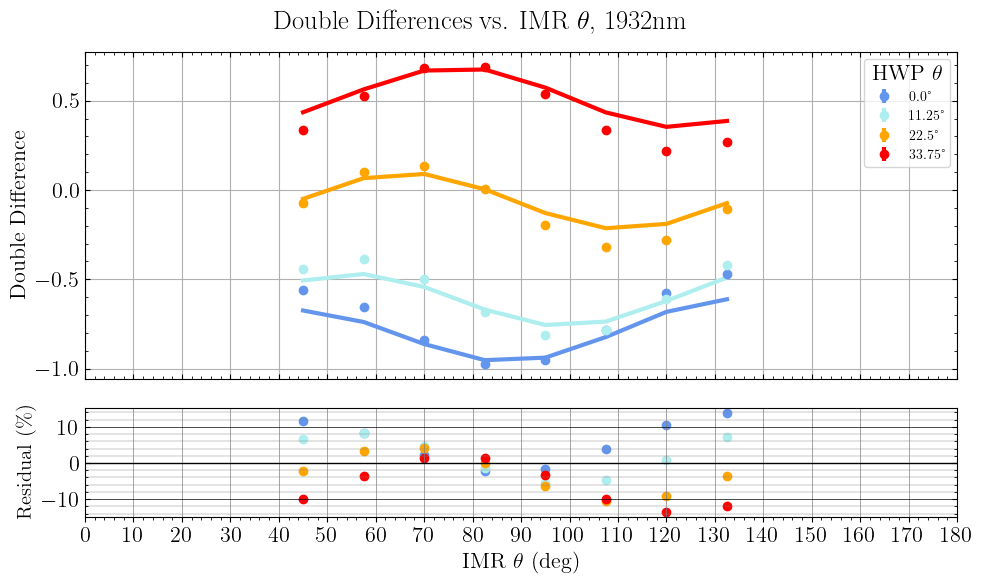

In [ ]:
# Make a plot of the mcmc results

offset_imr =0.18519 # derotator offset
offset_hwp = -0.87823 # HWP offset
offset_cal =  -0.44630 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "rotation matrix": {
                "type": "rotator_function",
                "properties" : {'pa':offset_cal},
            "tag": "internal",
                 
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "diattenuator_retarder_function",
                "properties": {"epsilon":0.9632},
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)

# Load in data
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/dd/charis_cube_info_bin15_no_pickoff_dd.csv')
interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")


# Get our model retardances 
wsio2_ = 1.66725
wmgf2_ = 1.30159
d_ = 259.19373
p = [HWP_retardance(wavelength_bins,wsio2_,wmgf2_)[15], IMR_retardance(wavelength_bins,d_)[15]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values


fig_imr, ax_imr,small_ax = plot_data_and_model_x_imr2(interleaved_values, interleaved_stds, diffs_sums,configuration_list, hwp_theta_filter=[0,11.25,22.5,33.75],wavelength= wavelength_bins[15], title=r'Double Differences vs. IMR $\theta$, 1932nm')
ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  # both major and minor
)
ax_imr.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
# Show minor ticks
ax_imr.minorticks_on()
ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',
      # both major and minor
)
small_ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)


small_ax.set_xlim(0,180)

# Show minor ticks
small_ax.minorticks_on()
#fig_imr.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/model_fitting/dd_plots/MCMC_vs_imr_1575.png', bbox_inches='tight', dpi=600)


# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


In [ ]:
def plot_data_and_model_x_imr_webplot(interleaved_values, interleaved_stds, model, 
    configuration_list, hwp_theta_filter=None, wavelength=None, save_path = None,title=None):
    """
    Plots single differences vs imr angle for some amount of HWP angles. Similar to figure 6 in
    Joost t Hart 2021.

    Parameters
    ----------
    interleaved_values : np.ndarray
        Interleaved array of observed double difference and double sum values.
        Expected format: [dd1, ds1, dd2, ds2, ...]. In CHARIS mode use
        single differences and sums.

    interleaved_stds : np.ndarray
        Interleaved array of standard deviations corresponding to the observed values.

    model : np.ndarray
        Interleaved array of model-predicted double difference and double sum values.
        If charis use single differences and sums. 

    configuration_list : list of dict
        List of system configurations (one for each measurement), where each dictionary 
        contains component settings like HWP and image rotator angles.

    hwp_theta_filter : float, optional
        If provided, only measurements with this hwp angle will be plotted.

    wavelength : str or int, optional
        Wavelength (e.g., 670 or "670") to display as a centered title with "nm" units 
        (e.g., "670nm").
    title: str, optional
        Optional title

    Returns
    -------
    fig, ax, small_ax
    """
    # Calculate double differences and sums from interleaved single differences if in VAMPIRES mode 
    interleaved_stds = process_errors(interleaved_stds, interleaved_values)
    interleaved_values = process_dataset(interleaved_values)
    model = process_model(model)

    # Extract double differences and double sums
    dd_values = interleaved_values[::2]
    ds_values = interleaved_values[1::2]
    dd_stds = interleaved_stds[::2]
    ds_stds = interleaved_stds[1::2]
    dd_model = model[::2]
    ds_model = model[1::2]

    # Group by hwp theta
    dd_by_theta = {}
    ds_by_theta = {}
   
    
    for i, config in enumerate(configuration_list[::2]):
        imr_theta = config["image_rotator"]["theta"]
        hwp_theta = config["hwp"]["theta"]

        if hwp_theta_filter is not None and not np.any(np.isclose(hwp_theta, hwp_theta_filter, atol=1e-2)):
         continue

        if hwp_theta not in dd_by_theta:
            dd_by_theta[hwp_theta] = {"imr_theta": [], "values": [], "stds": [], "model": []}
        dd_by_theta[hwp_theta]["imr_theta"].append(imr_theta)
        dd_by_theta[hwp_theta]["values"].append(dd_values[i])
        dd_by_theta[hwp_theta]["stds"].append(dd_stds[i])
        dd_by_theta[hwp_theta]["model"].append(dd_model[i])

        if hwp_theta not in ds_by_theta:
            ds_by_theta[hwp_theta] = {"imr_theta": [], "values": [], "stds": [], "model": []}
        ds_by_theta[hwp_theta]["imr_theta"].append(imr_theta)
        ds_by_theta[hwp_theta]["values"].append(ds_values[i])
        ds_by_theta[hwp_theta]["stds"].append(ds_stds[i])
        ds_by_theta[hwp_theta]["model"].append(ds_model[i])

    imrangles = [45,52.5,60,67.5,75,82.5,90,97.5,105,112.5]
    df0 = pd.read_csv('/Users/thomasmcintosh/Downloads/0_HWP.csv',header=None)
    df1125= pd.read_csv('/Users/thomasmcintosh/Downloads/1125_HWP.csv',header=None)
    df225 = pd.read_csv('/Users/thomasmcintosh/Downloads/225_HWP.csv',header=None)
    df3375 = pd.read_csv('/Users/thomasmcintosh/Downloads/3375_HWP.csv',header=None)

    num_plots = 1
    sizex=10
    fig, axarr = plt.subplots(
    3, 1, 
    figsize=(sizex, 6), 
    gridspec_kw={"height_ratios": [3, 1,1]}, 
    sharex=True
    )

    ax = axarr[0]
    small_ax = axarr[1]
    small_ax_2 = axarr[2]
    webplot = [df0[1],df1125[1],df225[1],df3375[1]]
    # get joost model
    lam = wavelength_bins[4]
    ret_hwp = np.rad2deg(HWP_retardance(lam))
    ret_imr = np.rad2deg(IMR_retardance(lam))
    charis_1329= scexmodel.MatrixModel(
        "CHARIS_1329",
        0,
        ret_hwp,
        -0.002,
        0,
        ret_imr,
        -0.012,
        1,
        -0.035,
        0,
        0,
        -45

    )
    derangles = np.linspace(45,112.5,10)
    sin = [1,0,0,0]
    params = charis_1329.FindParameterArray(np.deg2rad(derangles),sin,UsePolarizer=True)
    # Double Difference plot
    for idx, (theta, d) in enumerate(dd_by_theta.items()):
        hart_cmap = ['cornflowerblue','paleturquoise','orange','red']
        color=hart_cmap[idx]
        imrthetacorr = np.resize(np.array(d["imr_theta"]),np.array(params[idx]).shape)
        err = ax.errorbar(d["imr_theta"], d["values"], color=color,yerr=d["stds"], fmt='o', label=f"{theta}°")
        #color = err[0].get_color
        print(idx)

        ax.plot(derangles, -params[idx], '-', color=color)
        valscorr = np.resize(np.array(d["values"]),np.array(params[idx]).shape)
        residuals =  (valscorr - -params[idx])*100
        small_ax.scatter(derangles,residuals,color=color)
        wplot = np.resize(-webplot[idx],np.array(d["model"]).shape)
        wplotcorr = np.resize(np.array(wplot),np.array(params[idx]).shape)
        residuals2 = (np.array(wplotcorr - -params[idx])*100)
        imrangles_pl = np.resize(imrangles, np.array(residuals2).shape)

        small_ax_2.scatter(imrangles_pl,residuals2,color=color)
    small_ax.axhline(0, color='black', linewidth=1)
    small_ax.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='black')
    small_ax.grid(which='minor',axis='y', linestyle='-', linewidth=0.3, color='gray')
    small_ax.set_xlabel(r"IMR $\theta$ (deg)")
    small_ax.set_ylabel(r"Residual ($\%$)", fontsize = 10)
    small_ax_2.axhline(0, color='black', linewidth=1)
    small_ax_2.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='black')
    small_ax_2.grid(which='minor',axis='y', linestyle='-', linewidth=0.3, color='gray')
    small_ax_2.set_xlabel(r"IMR $\theta$ (deg)")
    small_ax_2.set_ylabel(r"WebPlot Residual ($\%$)", fontsize = 10)
    
    #small_ax.yaxis.set_minor_locator(MultipleLocator(1))
    small_ax.xaxis.set_major_locator(MultipleLocator(10))
    small_ax.grid(which='major', axis='x', linestyle='-', linewidth=0.5, color='gray')
    small_ax.tick_params(axis='y', which='minor', labelleft=False)
    small_ax_2.xaxis.set_major_locator(MultipleLocator(10))
    small_ax_2.grid(which='major', axis='x', linestyle='-', linewidth=0.5, color='gray')
    small_ax_2.tick_params(axis='y', which='minor', labelleft=False)
    df1 = pd.read_csv('/Users/thomasmcintosh/Downloads/0hwp.csv',header=None)
    df2 = pd.read_csv('/Users/thomasmcintosh/Downloads/1125hwp.csv',header=None)
    df3 = pd.read_csv('/Users/thomasmcintosh/Downloads/225hwp.csv',header=None)
    df4 = pd.read_csv('/Users/thomasmcintosh/Downloads/3375hwp.csv',header=None)
    ax.scatter(imrangles,-df0[1],marker='x',color='black',label='Web Plot Digitized')
    ax.scatter(imrangles,-df1125[1],marker='x',color='black')
    ax.scatter(imrangles,-df225[1],marker='x',color='black')
    ax.scatter(imrangles,-df3375[1],marker='x',color='black')
    small_ax_2.scatter(imrangles, -df1[1],marker='x',color='black',linewidth=1)
    small_ax_2.scatter(imrangles, -df2[1],marker='x',color='black',linewidth=1)
    small_ax_2.scatter(imrangles, -df3[1],marker='x',color='black',linewidth=1)
    small_ax_2.scatter(imrangles, -df4[1],marker='x',color='black',linewidth=1)
    small_ax_2.set_ylim(-5,5)
    small_ax.set_ylim(-5,5)
    
    ax.legend()
    ax.set_ylabel("Double Difference")
    ax.legend(title=r"HWP $\theta$", fontsize=10, loc='upper right')
    ax.grid()

    # Set a suptitle if wavelength is provided
    if wavelength is not None and title is None:
        fig.suptitle(f"{wavelength}nm")
        ax.xaxis.set_major_locator(MultipleLocator(10))    
        ax.xaxis.set_minor_locator(MultipleLocator(1)) 
    plt.tight_layout(rect=[0, 0, 1, 0.95])  #

    if title:
        fig.suptitle(title)

    if save_path != None:
        plt.savefig(save_path,dpi=600, bbox_inches='tight')


    return fig, ax,small_ax

In [ ]:
# get joost model
lam = wavelength_bins[4]
ret_hwp = np.rad2deg(HWP_retardance(lam))
ret_imr = np.rad2deg(IMR_retardance(lam))
charis_1329= scexmodel.MatrixModel(
    "CHARIS_1329",
    0,
    ret_hwp,
    -0.002,
    0,
    ret_imr,
    -0.012,
    1,
    -0.035,
    0,
    0,
    -45

)
derangles = np.linspace(45,112.5,10)
sin = [1,0,0,0]
params = charis_1329.FindParameterArray(np.deg2rad(derangles),sin,UsePolarizer=True)
print(params)


[[ 0.02142188 -0.46948125 -0.83081664 -0.96615465 -0.8398521  -0.4865605
  -0.00188615  0.48329177  0.83795902  0.96614039]
 [ 0.71135486  0.27166438 -0.23815534 -0.68200761 -0.94177276 -0.94890306
  -0.702718   -0.27050283  0.23061042  0.66511839]
 [ 0.99565445  0.86436539  0.50360217  0.00948023 -0.48647739 -0.85252183
  -0.99190254 -0.86870085 -0.51735694 -0.03334438]
 [ 0.70868805  0.96230103  0.96072943  0.70388575  0.25978164 -0.25364069
  -0.70003901 -0.96112017 -0.96824673 -0.72073845]]


0
1
2
3


0
1
2
3


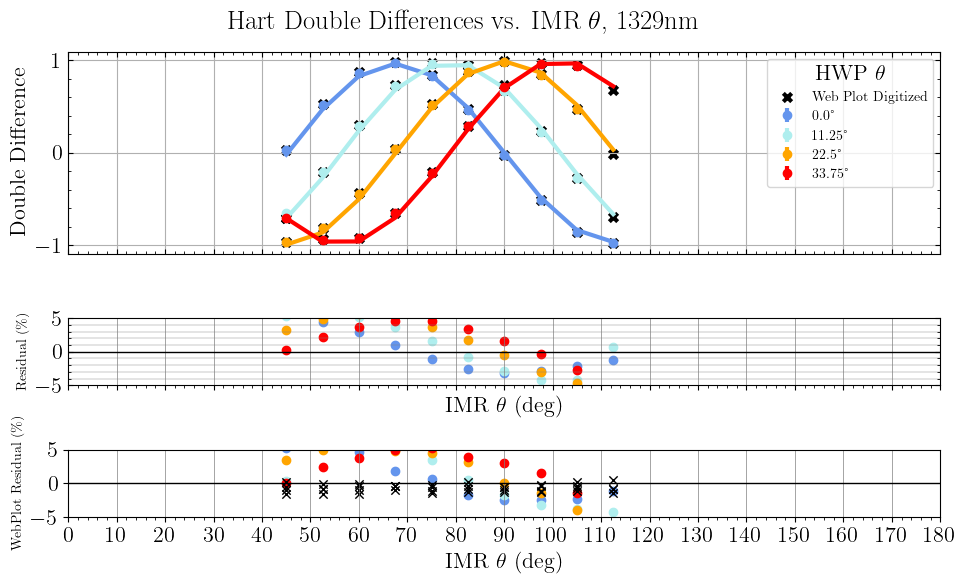

In [143]:
fig_imr, ax_imr,small_ax = plot_data_and_model_x_imr_webplot(interleaved_values, interleaved_stds, LR_intensities,configuration_list,hwp_theta_filter=[0,11.25,22.5,33.75],wavelength= wavelength_bins[4], title=r'Hart Double Differences vs. IMR $\theta$, 1329nm')
# ax_imr.plot(derangles,-params[0],color='green',label='0')
# ax_imr.plot(derangles,-params[1],color='green',label='11.25')
# ax_imr.plot(derangles,-params[2],color='green',label='22.5')
# ax_imr.plot(derangles,-params[3],color='green',label='33.75')
# ax_imr.legend()

ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  # both major and minor
)
ax_imr.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
# Show minor ticks
ax_imr.minorticks_on()
ax_imr.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',
      # both major and minor
)
small_ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)

small_ax.set_xlim(0,180)

# Show minor ticks
small_ax.minorticks_on()
#fig_imr.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/model_fitting/dd_plots/HART_vs_imr_1329_50xres',bbox_inches='tight',dpi=600)